In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#show some example of dataset
#1.Understand variables
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


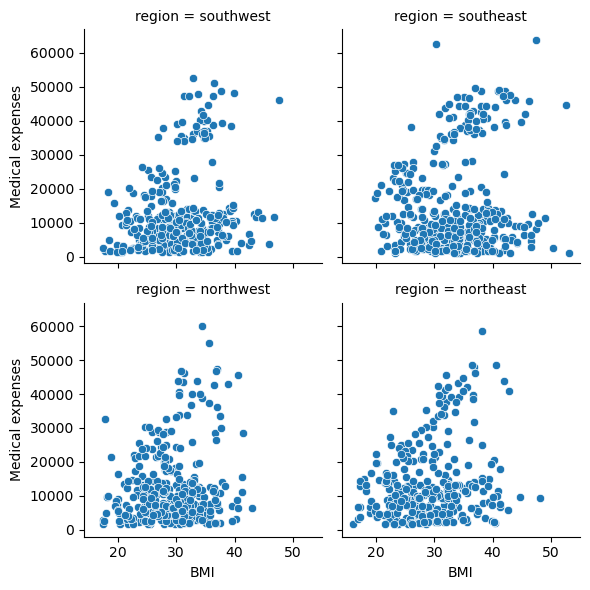

In [50]:
g = sns.FacetGrid(data=df, col="region",col_wrap=2)
g.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI")

# Understand Variables

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df['region'].unique().tolist()

['southwest', 'southeast', 'northwest', 'northeast']

In [8]:
df_groupby=df.groupby('region').count().reset_index()
df_groupby

,region,age,sex,bmi,children,smoker,charges
0,northeast,324,324,324,324,324,324
1,northwest,325,325,325,325,325,325
2,southeast,364,364,364,364,364,364
3,southwest,325,325,325,325,325,325


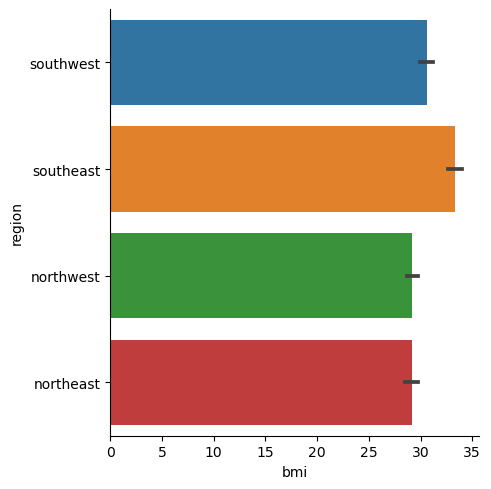

In [10]:
sns.catplot(data=df,y='region',x='bmi',kind='bar')
#People who are located in Southeast have the highest mean for bmi

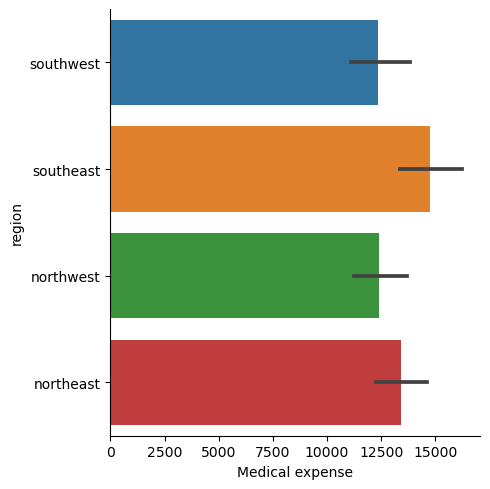

In [11]:
sns.catplot(data=df,y='region',x='charges',kind='bar').set(xlabel="Medical expense")
#People who are located in Southeast have the highest mean for medical expenses

#### What I notiec from graph above: People who are located in Southest have the highest BMI mean and also highest mdeical expense mean.

# Clean Data
### Going deeper exploration regarding regions vs. bmi
- There are 4 regions: Northeast, Northwest, Southeast, Southwest
- I will separate bmi into 4 categories: Underweight (<18.5), Normal weight (18.5-24.9), Overweight (25-29.9), and Obesity (>30)

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


/var/folders/z4/pxsk3rl90yscry46gyl5t3_c0000gn/T/ipykernel_25739/3680391185.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  df1 = sns.displot(data=df, x="bmi",hue="region",multiple="dodge",height=5,aspect=2,palette=color1).set(ylabel='Number of people',


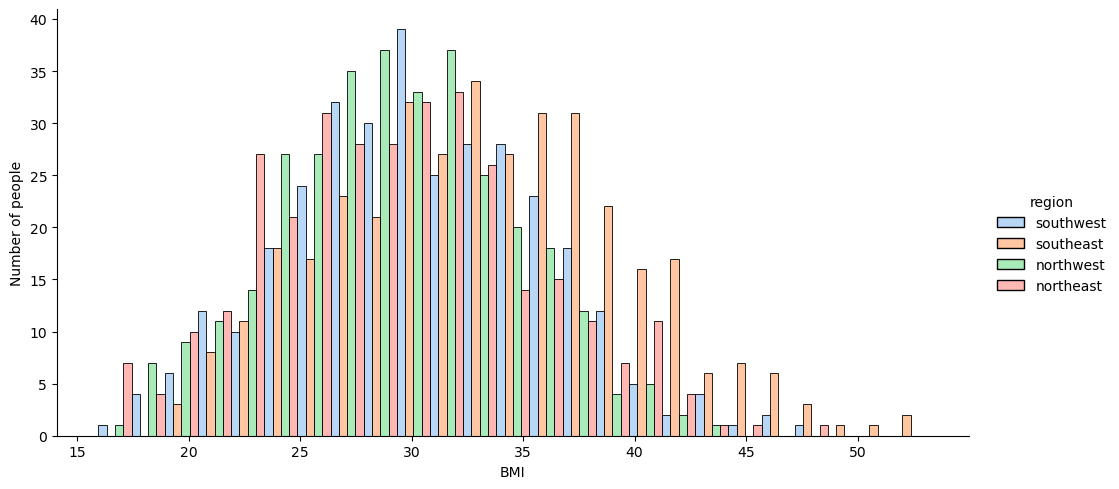

In [13]:
color1=sns.color_palette("pastel")
df1 = sns.displot(data=df, x="bmi",hue="region",multiple="dodge",height=5,aspect=2,palette=color1).set(ylabel='Number of people',
                                                                                       xlabel='BMI')
df1

/var/folders/z4/pxsk3rl90yscry46gyl5t3_c0000gn/T/ipykernel_25739/37236582.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  df2 = sns.displot(data=df, x="charges",hue="region",multiple="dodge",height=5,aspect=2,palette=color2).set(ylabel='Number of people',


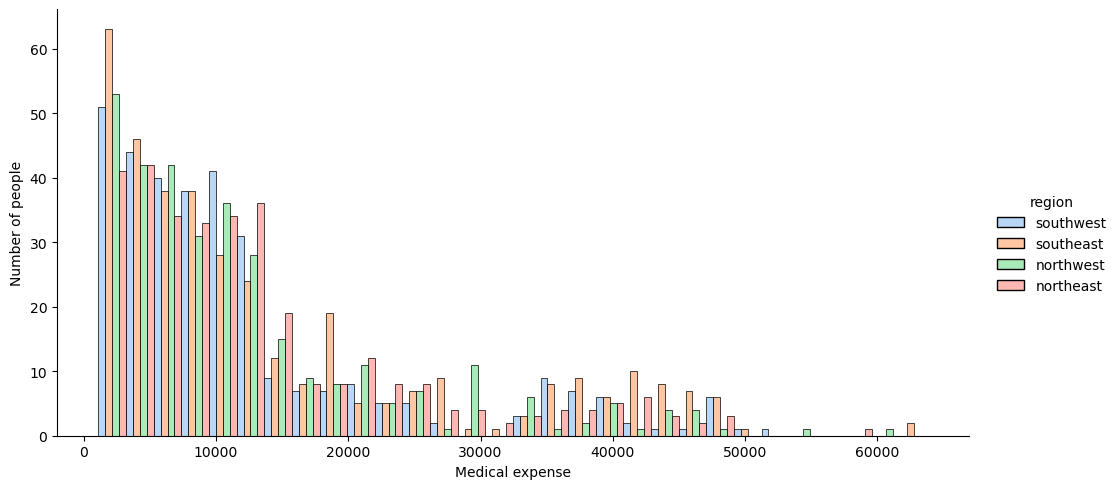

In [51]:
color2=sns.color_palette("pastel")
df2 = sns.displot(data=df, x="charges",hue="region",multiple="dodge",height=5,aspect=2,palette=color2).set(ylabel='Number of people',
                                                                                       xlabel='Medical expense')
df2

### Table of Relationship Among bmi, region, and charges

In [15]:
df_drop1=df.drop(columns=['age','sex','children','smoker'])
df_drop1

,bmi,region,charges
0,27.900,southwest,16884.92400
1,33.770,southeast,1725.55230
2,33.000,southeast,4449.46200
3,22.705,northwest,21984.47061
4,28.880,northwest,3866.85520
...,...,...,...
1333,30.970,northwest,10600.54830
1334,31.920,northeast,2205.98080
1335,36.850,southeast,1629.83350
1336,25.800,southwest,2007.94500


In [72]:
df1=df_drop1[(df_drop1['bmi']<18.5)]
df1.sort_values('charges', ascending=False)

,bmi,region,charges
128,17.765,northwest,32734.18630
1085,18.300,southwest,19023.26000
380,17.955,northeast,15006.57945
412,17.195,northeast,14455.64405
1074,18.335,northeast,13204.28565
250,17.290,northeast,12829.45510
950,18.335,northeast,11534.87265
1133,18.335,northwest,9991.03765
198,18.050,northwest,9644.25250
1029,17.290,northeast,6877.98010


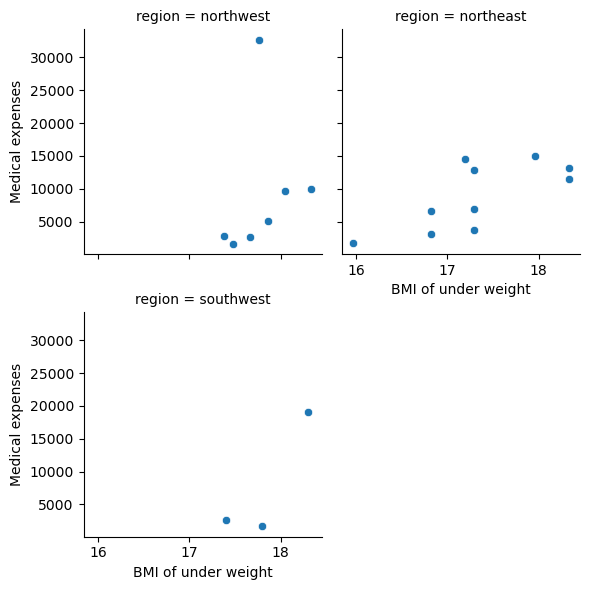

In [73]:
under = sns.FacetGrid(data=df1, col="region",col_wrap=2)
under.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of under weight")


In [70]:
df2=df_drop1[(df_drop1['bmi']>=18.5)&(df_drop1['bmi']<=24.9)]
df2.sort_values('charges', ascending=False)

,bmi,region,charges
917,22.895,northeast,35069.37452
62,24.700,northwest,30166.61817
140,22.420,northeast,27375.90478
1142,24.860,southeast,27117.99378
664,22.990,southeast,27037.91410
...,...,...,...
1292,23.210,southeast,1515.34490
584,20.700,southwest,1242.81600
681,20.300,southwest,1242.26000
1251,19.800,southwest,1241.56500


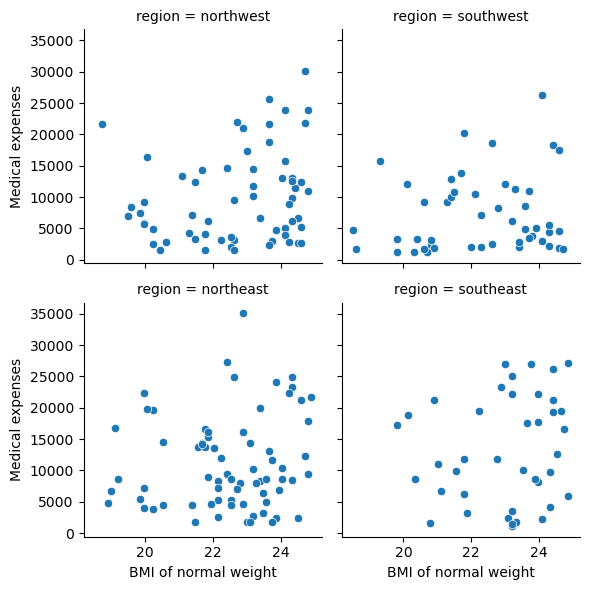

In [64]:
normal = sns.FacetGrid(data=df2, col="region",col_wrap=2)
normal.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of normal weight")

In [69]:
df3=df_drop1[(df_drop1['bmi']>=25)&(df_drop1['bmi']<=29.9)]
df3.sort_values('charges', ascending=False)

,bmi,region,charges
524,26.070,southeast,38245.59327
1303,27.800,southwest,37829.72420
242,26.800,southwest,35160.13457
476,28.500,northeast,35147.52848
641,28.310,northwest,32787.45859
...,...,...,...
133,25.555,northwest,1632.56445
464,25.175,northwest,1632.03625
236,26.730,southeast,1615.76670
487,28.700,southwest,1253.93600


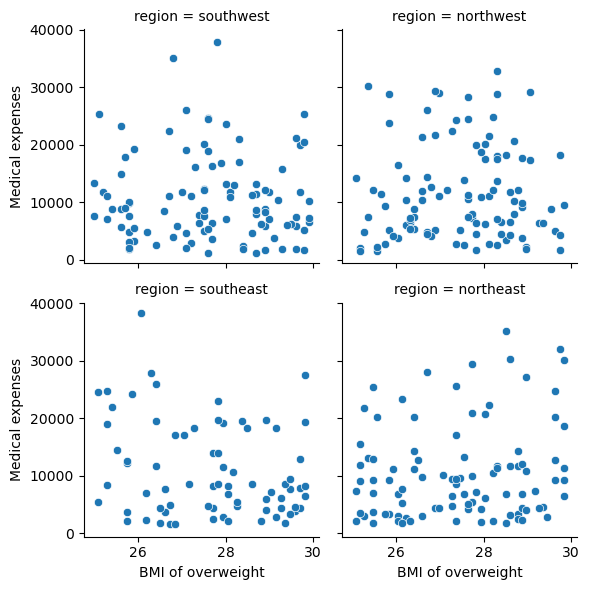

In [67]:
over = sns.FacetGrid(data=df3, col="region",col_wrap=2)
over.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of overweight")


In [74]:
df4=df_drop1[(df_drop1['bmi']>=30)]
df4.sort_values('charges', ascending=False)

,bmi,region,charges
543,47.410,southeast,63770.42801
1300,30.360,southeast,62592.87309
1230,34.485,northwest,60021.39897
577,38.095,northeast,58571.07448
819,35.530,northwest,55135.40209
...,...,...,...
194,34.430,southeast,1137.46970
22,34.100,southeast,1137.01100
663,33.660,southeast,1136.39940
1244,33.330,southeast,1135.94070


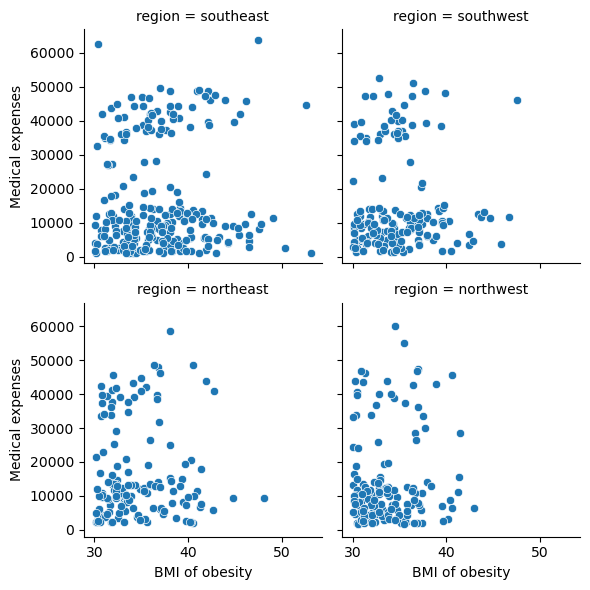

In [63]:
obe = sns.FacetGrid(data=df4, col="region",col_wrap=2)
obe.map(sns.scatterplot, "bmi", "charges").set(ylabel="Medical expenses",xlabel="BMI of obesity")

### Obervation from the analysis above
- There is no information regarding people who are located in southeast with BMI below 15.9 which is underweight There is only one case with underweight paying medical expense higher than 30000 dollars and that person is located in northwest. There is one person who is located in southwest has to pay the medical expense around 20000 dollars. Other cases in other regions pay lower than 15000 dollars. 
- A person who is located in northeast has to pay 35000 dollar, that is the only case of all the regions that pay higher than 30000 dollars within people with normal weight. 
- The highest medical expense happen with a person who is located in southeast. Yet, most people in each region have the medical expense lower than 25000 dollars
- Clearly, People with normal or overweight have similar medical expense and it is between 5000 and 15000 dollars
- There are more poeple with obesity going to hospital and pay for medical expense. It can be noticed from the density of the graph above.
